In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [21]:
# View all of the classes that automap found
Station=Base.classes.station
Measurement=Base.classes.measurement
session=Session(engine)
inspector=inspect(engine)

In [22]:
# Save references to each table
stations=engine.execute('Select * FROM Station')
print(stations.keys())

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [23]:
# Create our session (link) from Python to the DB
session=Session(engine)
inspector=inspect(engine)

In [24]:
stations.fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [25]:
#List Station Column Data Types
columns=inspector.get_columns("Station")
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [26]:
# Measurements table headers
measurements=engine.execute('SELECT * FROM Measurement LIMIT 15')
print(measurements.keys())

['id', 'station', 'date', 'prcp', 'tobs']


In [27]:
#Get measurement table data
measurements.fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0)]

In [29]:
#List Measurement column data types
columns=inspector.get_columns('Measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
recent_date=(session.query(Measurement.date)
            .order_by(Measurement.date.desc())
            .first())
recent_date

('2017-08-23')

Date one year from last date is 2016-08-22


Text(0.5, 1.0, 'Honolulu, Hawaii Daily Precipitation for One Year')

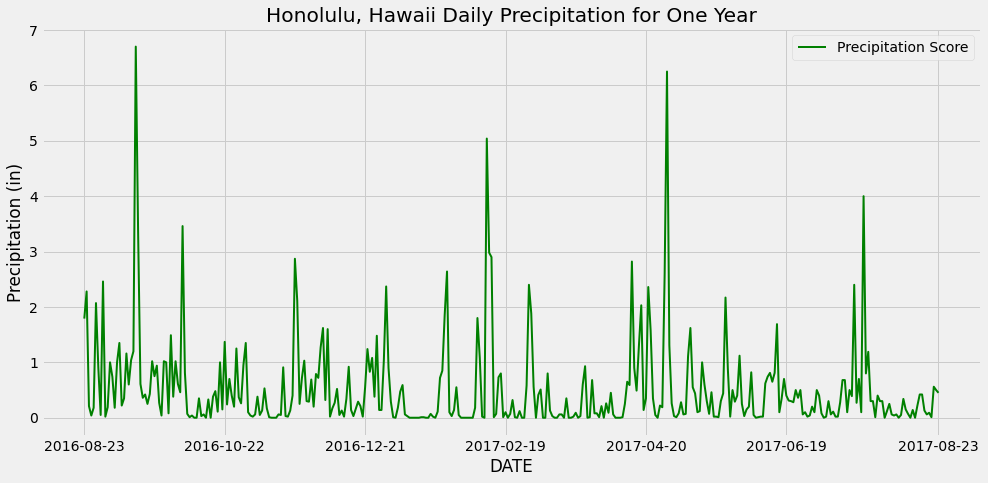

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
Year_ago=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('Date one year from last date is', Year_ago)

# Perform a query to retrieve the data and precipitation scores
year_precip=(session.query(Measurement.date,func.max(Measurement.prcp))
            .filter(func.strftime('%Y-%m-%d',Measurement.date) > Year_ago)
            .group_by(Measurement.date)
            .all())

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df=pd.DataFrame(year_precip, columns=['Date', 'Precipitation Score'])
precip_df.set_index('Date',inplace=True)
precip_df.head(10)

# Sort the dataframe by date
precip_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['figure.figsize']=(15,7)
precip_df.plot(linewidth=2, alpha=1, rot=0, xticks = (0,60,120,180,240,300,365), color="green")
plt.xlabel('DATE')
plt.ylabel('Precipitation (in)')
plt.title('Honolulu, Hawaii Daily Precipitation for One Year')



In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data
annual_precip_stats=(session.query(Measurement.date, Measurement.prcp)
                    .filter(Measurement.date > Year_ago)
                    .all())
annual_precip_stats_df=pd.DataFrame(annual_precip_stats, columns=['Date', 'Precipitation'])
annual_precip_stats_df.dropna()
annual_precip_stats_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number stations in the dataset
Total_stations=session.query(Station).count()
print(f'There are {Total_stations} stations in Honolulu, Hawaii')

There are 9 stations in Honolulu, Hawaii


In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Station_Activity=(session.query(Measurement.station, func.count(Measurement.station))
                               .group_by(Measurement.station)
                               .order_by(func.count(Measurement.station).desc())
                               .all())
Station_Activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs=[Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)]
Most_Active_Station=(session.query(*tobs).filter(Measurement.station=='USC00519281').all())

Most_Active_Station_temp=pd.DataFrame(Most_Active_Station, columns=['Station', 'Min_Temp', 'Max_Temp', 'Avg_Temp'])
Most_Active_Station_temp.set_index('Station', inplace=True)
Most_Active_Station_temp

,Min_Temp,Max_Temp,Avg_Temp
Station,,,
USC00519281,54.0,85.0,71.663781


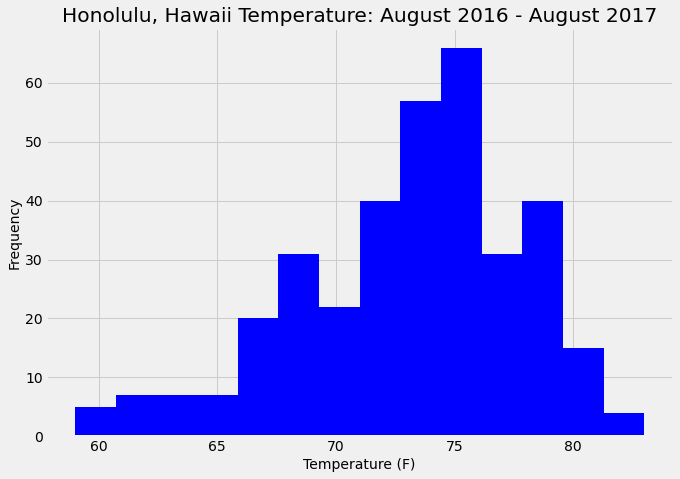

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Annual_Tobs=(session.query(Measurement.date, (Measurement.tobs))
            .filter(func.strftime(Measurement.date)>Year_ago)
            .filter(Measurement.station=='USC00519281')
            .all())

Tobs_df=pd.DataFrame(Annual_Tobs)
Tobs_df.set_index('date', inplace=True)

plt.rcParams['figure.figsize']=(10,7)
plt.hist(Tobs_df['tobs'], bins=14, color='blue')
plt.title('Honolulu, Hawaii Temperature: August 2016 - August 2017')
plt.xlabel('Temperature (F)', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')
plt.show()

# Close session

In [54]:
# Close Session
session.close()